# LSTM과 GRU 셀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/9-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## LSTM 신경망 훈련하기

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [4]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 21ms/step - loss: 0.6922 - accuracy: 0.5435 - val_loss: 0.6906 - val_accuracy: 0.5886
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6877 - accuracy: 0.6327 - val_loss: 0.6829 - val_accuracy: 0.6708
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6647 - accuracy: 0.6944 - val_loss: 0.6343 - val_accuracy: 0.7098
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6053 - accuracy: 0.7117 - val_loss: 0.5918 - val_accuracy: 0.7134
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5763 - accuracy: 0.7304 - val_loss: 0.5709 - val_accuracy: 0.7320
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5540 - accuracy: 0.7467 - val_loss: 0.5487 - val_accuracy: 0.7470
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5326 - accuracy: 0.7625 - val_loss: 0.5285 - val_accuracy

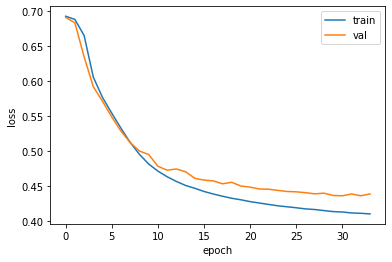

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 순환 층에 드롭아웃 적용하기

In [6]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [7]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 21ms/step - loss: 0.6929 - accuracy: 0.5147 - val_loss: 0.6927 - val_accuracy: 0.5338
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6918 - accuracy: 0.5716 - val_loss: 0.6911 - val_accuracy: 0.5994
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6887 - accuracy: 0.6428 - val_loss: 0.6851 - val_accuracy: 0.6766
Epoch 4/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6666 - accuracy: 0.6772 - val_loss: 0.6351 - val_accuracy: 0.7054
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6195 - accuracy: 0.6981 - val_loss: 0.6059 - val_accuracy: 0.7084
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5951 - accuracy: 0.7171 - val_loss: 0.5846 - val_accuracy: 0.7296
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5743 - accuracy: 0.7350 - val_loss: 0.5613 - val_accuracy:

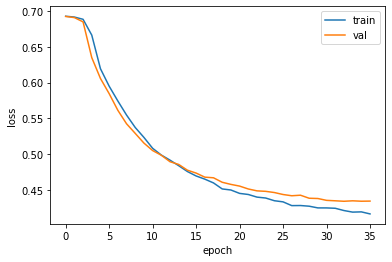

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 2개의 층을 연결하기

In [9]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [10]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 43ms/step - loss: 0.6927 - accuracy: 0.5375 - val_loss: 0.6921 - val_accuracy: 0.5916
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6900 - accuracy: 0.5748 - val_loss: 0.6862 - val_accuracy: 0.6402
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6643 - accuracy: 0.6443 - val_loss: 0.6234 - val_accuracy: 0.6786
Epoch 4/100
313/313 [==============================] - 13s 40ms/step - loss: 0.5833 - accuracy: 0.7151 - val_loss: 0.5522 - val_accuracy: 0.7318
Epoch 5/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5374 - accuracy: 0.7417 - val_loss: 0.5187 - val_accuracy: 0.7554
Epoch 6/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5097 - accuracy: 0.7574 - val_loss: 0.4940 - val_accuracy: 0.7682
Epoch 7/100
313/313 [==============================] - 13s 40ms/step - loss: 0.4920 - accuracy: 0.7671 - val_loss: 0.4819 - val_ac

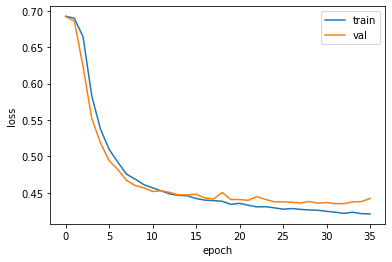

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## GRU 신경망 훈련하기

In [12]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 21ms/step - loss: 0.6924 - accuracy: 0.5174 - val_loss: 0.6914 - val_accuracy: 0.5478
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6903 - accuracy: 0.5601 - val_loss: 0.6892 - val_accuracy: 0.5740
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6871 - accuracy: 0.5849 - val_loss: 0.6855 - val_accuracy: 0.5888
Epoch 4/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6820 - accuracy: 0.6039 - val_loss: 0.6799 - val_accuracy: 0.5948
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6744 - accuracy: 0.6191 - val_loss: 0.6713 - val_accuracy: 0.6132
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6629 - accuracy: 0.6321 - val_loss: 0.6589 - val_accuracy: 0.6248
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6457 - accuracy: 0.6491 - val_loss: 0.6391 - val_accuracy:

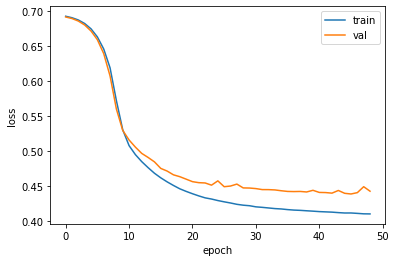

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 마무리

In [15]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 12s 15ms/step - loss: 0.4291 - accuracy: 0.8004


[0.4291330873966217, 0.8004400134086609]